In [1]:
import tensorflow_datasets as tfds
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

train_data, test_data = tfds.load('stl10', 
                        split=['train', 'test'],
                        as_supervised=True, 
                        shuffle_files=True,
                        data_dir=".")

In [2]:
# A rough list of labels - these are not the actual labels, I just inferred them based on the images. You may want to replace these with the proper labels.
label_map = ['plane', 'bird', 'car', 'cat', 'deer', 'dog', 'horse', 'primate', 'boat', 'truck']

In [3]:
BATCH_SIZE = 25
STEPS_PER_EPOCH = len(list(train_data)) / BATCH_SIZE

In [4]:
def process(img, label):
    # Converts the int data types to float32 and normalizes the values
    processed_img = tf.cast(img, tf.float32) / 255.0
    return processed_img, tf.one_hot(label, depth=10, dtype=tf.int8)

processed_dataset = train_data.map(process).shuffle(64).batch(BATCH_SIZE)

processed_test = test_data.map(process).shuffle(64).batch(BATCH_SIZE)

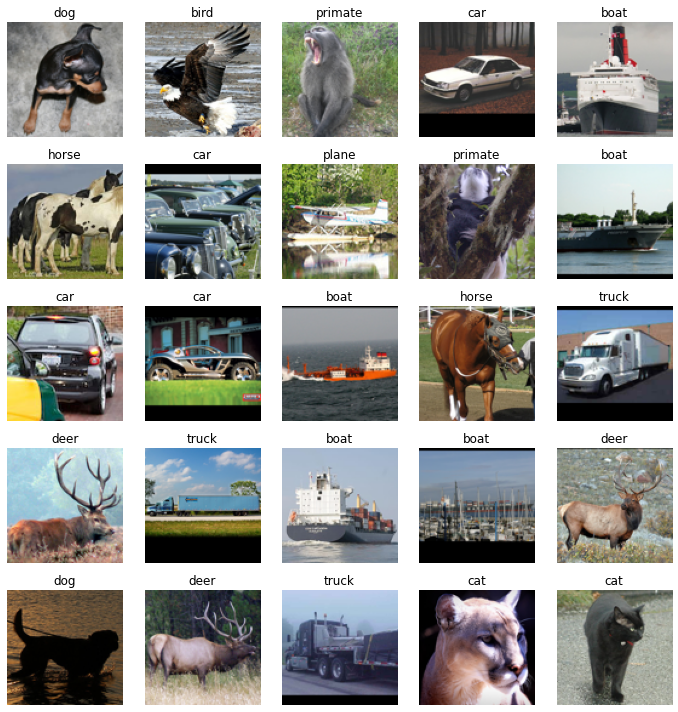

In [5]:
"""Function to render a 25 image batch from a dataset """
def render_batch(renderable_dataset):
    batch = renderable_dataset.take(1)
    batch_iterator = batch.as_numpy_iterator()
    plt.figure(figsize=(10,10))
    for imgs, labels in batch_iterator:
        for i, (img, label) in enumerate(zip(imgs, labels)):
            plt.subplot(5,5,i+1)
            plt.axis('off')
            plt.imshow(img.squeeze().astype('float'))
            plt.tight_layout()
            str_label = label_map[[i for i,(x) in enumerate(label) if x == 1][0]]
            plt.title(str_label)

render_batch(processed_dataset)

In [6]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(96,96,3)),
  tf.keras.layers.Flatten(data_format = "channels_last"),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(128, activation='tanh'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [7]:
history = model.fit(processed_dataset, epochs=10)

Epoch 1/10
200/200 [==============================] - 11s 54ms/step - loss: 2.3221 - accuracy: 0.1592
Epoch 2/10
200/200 [==============================] - 11s 53ms/step - loss: 2.1869 - accuracy: 0.1638
Epoch 3/10
200/200 [==============================] - 10s 51ms/step - loss: 2.1493 - accuracy: 0.1682
Epoch 4/10
200/200 [==============================] - 10s 49ms/step - loss: 2.1215 - accuracy: 0.1680
Epoch 5/10
200/200 [==============================] - 10s 50ms/step - loss: 2.1148 - accuracy: 0.1746
Epoch 6/10
200/200 [==============================] - 10s 48ms/step - loss: 2.0958 - accuracy: 0.1686

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 27648)             0         
_________________________________________________________________
dropout (Dropout)            (None, 27648)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               3539072   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 3,540,362
Trainable params: 3,540,362
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Validate loss and accuracy by comparing the train function to the test function
val_loss, val_acc = model.evaluate(processed_test)

    320/Unknown - 9s 28ms/step - loss: 2.0317 - accuracy: 0.1935

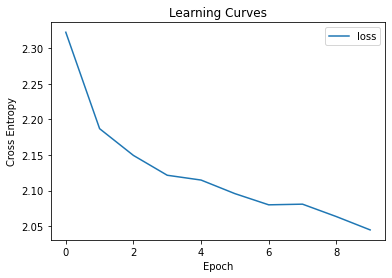

In [10]:
plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('Cross Entropy')
plt.plot(history.history['loss'], label='loss')
plt.legend()
plt.show()

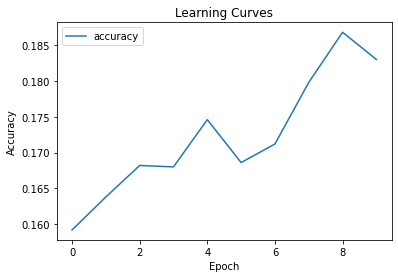

In [12]:
plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(history.history['accuracy'], label='accuracy')
plt.legend()
plt.show()